<a href="https://colab.research.google.com/github/Kylehanna/-Euclidean_and_Manhattan_Distances_Case_Study/blob/main/NFT_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Data soucre - https://www.kaggle.com/mathurinache/nft-history-sales/code

## Import Modules 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Import data


In [2]:
datapath = ('/content/drive/MyDrive/GROUND GAME AI/Unit 20 - Data Storytelling/NFT_Sales.csv')

nft = pd.read_csv(datapath)

### Establish data dictionary



*   `Date` - the sale date of the NFT. 
*   `Sales_USD_cumsum` - Cumulative NFT sales value in USD.
* `Number_of_Sales_cumsum` - Total times the NFT was sold.
*`Active_Market_Wallets_cumsum` - Number of sales to active wallets
*`Primary_Sales_cumsum` -  Number of primary sales overtime 
*`Secondary_Sales_cumsum`- After an NFT is minted, it can be sold or purchased on the secondary market, such as OpenSea.
*`AverageUSD_cum`- Average sale price of the NFT.
*`Sales_USD`- Total amount from sales in USD.
*`Number_of_Sales`- Number of times an NFT has been sold.
*`Active_Market_Wallets`- An active market wallet is a wallet that routinely experiences high transaction volumes. 
*`Primary_Sales`- Primary sales happen when the Manufacturer sells goods to distributors. This is the first and primary movement of goods.



In [3]:
nft.shape

(1606, 11)

In [4]:
nft.head()

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [5]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1606 non-null   object 
 1   Sales_USD_cumsum              1606 non-null   float64
 2   Number_of_Sales_cumsum        1606 non-null   int64  
 3   Active_Market_Wallets_cumsum  1598 non-null   float64
 4   Primary_Sales_cumsum          1606 non-null   int64  
 5   Secondary_Sales_cumsum        1605 non-null   float64
 6   AverageUSD_cum                1605 non-null   float64
 7   Sales_USD                     1605 non-null   float64
 8   Number_of_Sales               1605 non-null   float64
 9   Active_Market_Wallets         1597 non-null   float64
 10  Primary_Sales                 1605 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 138.1+ KB


In [6]:
nft.describe()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
count,1.606000e+03,1.606000e+03,1598.000000,1.606000e+03,1605.000000,1605.000000,1.605000e+03,1605.000000,1597.000000,1605.000000
mean,5.914905e+08,3.397818e+06,155847.829161,2.218615e+06,2749.373832,98.241209,6.372813e+06,6866.409346,502.875391,4117.035514
std,1.720005e+09,2.329504e+06,136083.110285,1.432603e+06,5597.500898,179.880778,2.486102e+07,12610.348160,1363.808979,7578.887189
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1024.000000,7.140000,-6.196720e+06,-2195.000000,-573.000000,-1171.000000
25%,5.129669e+07,1.451181e+06,81998.250000,9.735630e+05,662.000000,27.110000,4.605234e+04,2274.000000,69.000000,1462.000000
50%,8.691480e+07,3.203392e+06,121914.000000,2.296888e+06,1025.000000,32.050000,8.218757e+04,3681.000000,126.000000,2358.000000
75%,1.328586e+08,4.938128e+06,180948.250000,3.150981e+06,1846.000000,71.360000,3.528744e+05,5844.000000,267.000000,3695.000000
max,1.023456e+10,1.102278e+07,803665.000000,6.609013e+06,69685.000000,928.490000,3.886364e+08,161732.000000,30129.000000,93609.000000


## Check for missing values

In [7]:
nft.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [8]:
#nft[nft['Active_Market_Wallets_cumsum '].isna()]

null_data = nft[nft.isnull().any(axis=1)]

In [9]:
null_data.sort_values(by='Date')

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.000000e+00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1598,2021-11-05,9.890102e+09,10691247,NaN,6398169,7019.0,925.07,3.092464e+07,12475.0,NaN,5456.0
1599,2021-11-06,9.948558e+09,10809535,NaN,6472314,44143.0,920.35,5.845599e+07,118288.0,NaN,74145.0
1600,2021-11-07,1.001097e+10,10853882,NaN,6496920,19741.0,922.34,6.240829e+07,44347.0,NaN,24606.0
1601,2021-11-08,1.008803e+10,10913146,NaN,6541355,14829.0,924.39,7.706698e+07,59264.0,NaN,44435.0
1602,2021-11-09,1.014001e+10,10964025,NaN,6573511,18723.0,924.84,5.197508e+07,50879.0,NaN,32156.0
1603,2021-11-10,1.019902e+10,11008847,NaN,6601205,17128.0,926.44,5.901034e+07,44822.0,NaN,27694.0
1604,2021-11-11,1.023456e+10,11022782,NaN,6609013,6127.0,928.49,3.554317e+07,13935.0,NaN,7808.0
1605,2021-11-12,1.022836e+10,11020587,NaN,6607842,-1024.0,928.11,-6.196720e+06,-2195.0,NaN,-1171.0


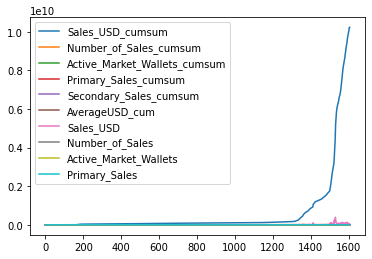

In [10]:
nft.plot()

In [11]:
nft['Active_Market_Wallets_cumsum'] = nft['Active_Market_Wallets_cumsum'].fillna(nft['Active_Market_Wallets_cumsum'].mean())
nft['Active_Market_Wallets'] = nft['Active_Market_Wallets'].fillna(nft['Active_Market_Wallets'].mean())
nft = nft.fillna(0)

In [12]:
nft.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
dtype: int64

## Data Visualization

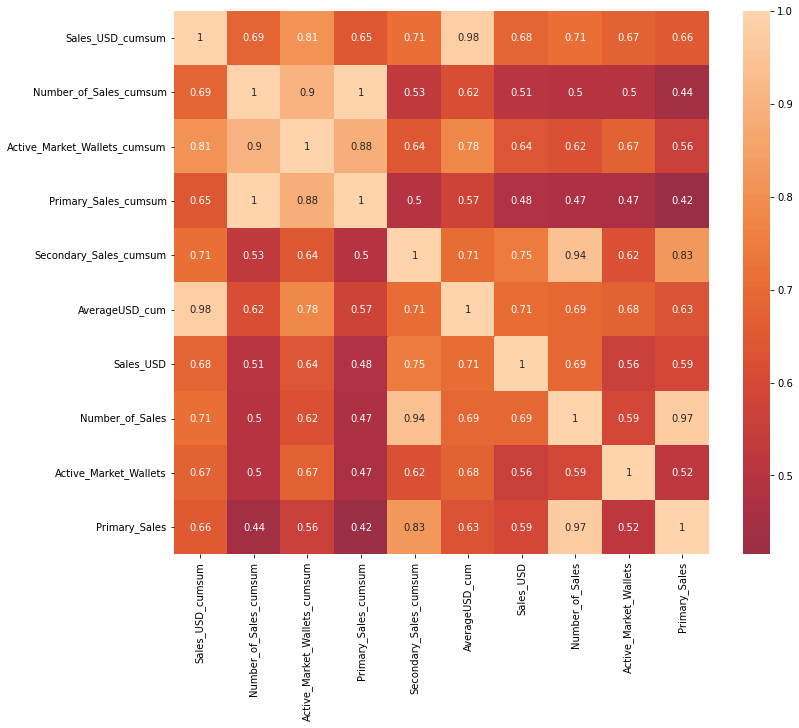

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(nft.corr(), center=0, annot=True)

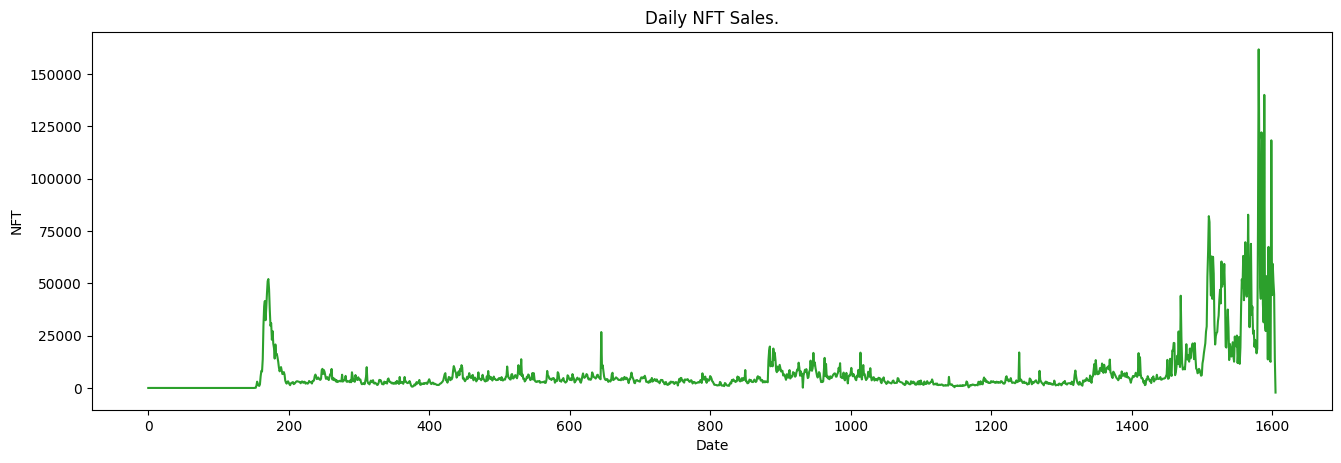

In [14]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(nft.index,nft.Number_of_Sales, color='tab:green')
plt.gca().set(title='Daily NFT Sales.', xlabel='Date', ylabel='NFT')
plt.show()

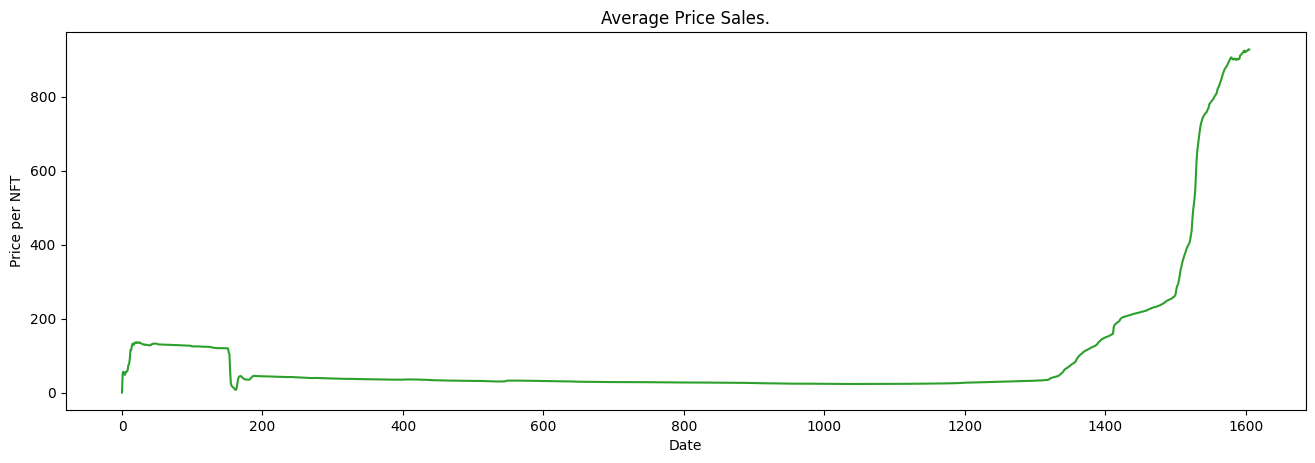

In [32]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(nft.index,nft.AverageUSD_cum, color='tab:green')
plt.gca().set(title='Average Price Sales.', xlabel='Date', ylabel='Price per NFT')
plt.show()

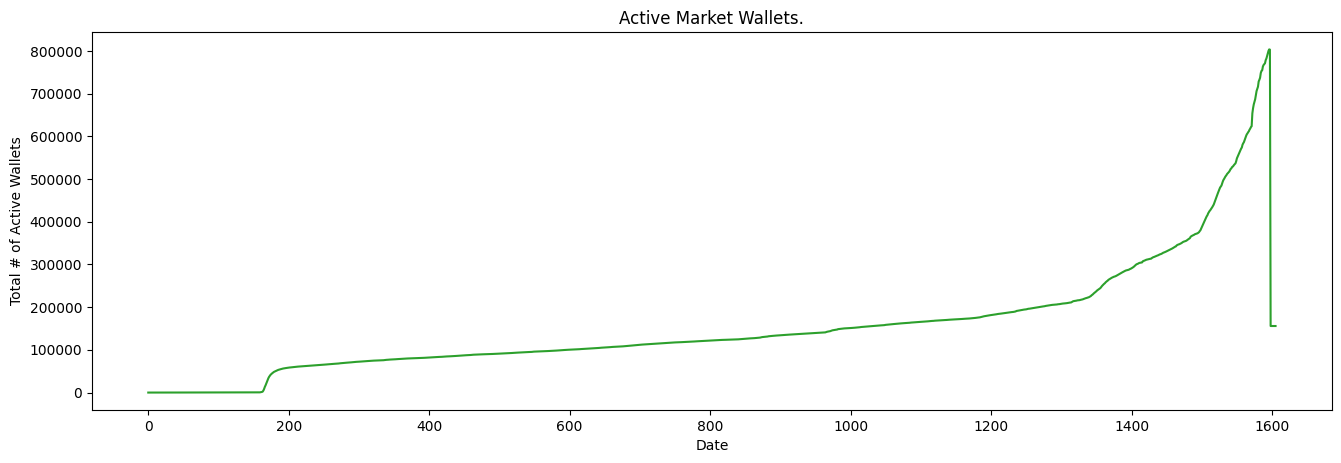

In [33]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(nft.index,nft.Active_Market_Wallets_cumsum, color='tab:green')
plt.gca().set(title='Active Market Wallets.', xlabel='Date', ylabel='Total # of Active Wallets')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


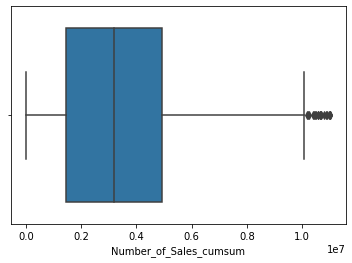

In [27]:
sns.boxplot('Number_of_Sales_cumsum', data = nft)

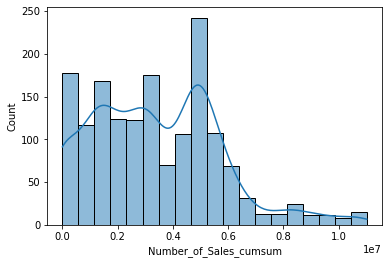

In [29]:
sns.histplot(nft['Number_of_Sales_cumsum'], kde=True)